#### Check API

In [ ]:
import requests
import json
from src import config_loader
key = config_loader.get_api_key() 
url = f"https://api.weatherstack.com/current?access_key={key}" 
querystring = {"query":"Coimbatore"} # enter city here
response = requests.get(url, params=querystring)
data = response.json()
data


{'request': {'type': 'City',
  'query': 'Coimbatore, India',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Coimbatore',
  'country': 'India',
  'region': 'Tamil Nadu',
  'lat': '10.993',
  'lon': '76.961',
  'timezone_id': 'Asia/Kolkata',
  'localtime': '2025-07-07 20:57',
  'localtime_epoch': 1751921820,
  'utc_offset': '5.50'},
 'current': {'observation_time': '03:27 PM',
  'temperature': 27,
  'weather_code': 143,
  'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0006_mist.png'],
  'weather_descriptions': ['Mist'],
  'astro': {'sunrise': '06:05 AM',
   'sunset': '06:49 PM',
   'moonrise': '03:56 PM',
   'moonset': '02:46 AM',
   'moon_phase': 'Waxing Gibbous',
   'moon_illumination': 86},
  'air_quality': {'co': '264.55',
   'no2': '4.255',
   'o3': '69',
   'so2': '3.7',
   'pm2_5': '14.615',
   'pm10': '30.34',
   'us-epa-index': '1',
   'gb-defra-index': '1'},
  'wind_speed': 21,
  'wind_degree': 236,
  'wind_dir': 'WSW',
  'pre

#### Check JSON Stucture via DF Conversion

In [3]:
import pandas as pd
df = pd.json_normalize(data)
df

,request.type,request.query,request.language,request.unit,location.name,location.country,location.region,location.lat,location.lon,location.timezone_id,...,current.wind_degree,current.wind_dir,current.pressure,current.precip,current.humidity,current.cloudcover,current.feelslike,current.uv_index,current.visibility,current.is_day
0,City,"Coimbatore, India",en,m,Coimbatore,India,Tamil Nadu,10.993,76.961,Asia/Kolkata,...,236,WSW,1010,0,74,50,31,0,5,no


#### Check DB

In [ ]:
# Checking DB containing Raw Data

import sqlite3
conn = sqlite3.connect("D:/Test/data/DB/weather_data.db")
cursor = conn.cursor()
cursor.execute('SELECT * FROM current_weather')
rows = cursor.fetchall()
for i in rows:
    print (i)

(1, 33.0, 'Haze', '06:02 AM', '06:36 PM', '02:38 PM', '02:26 AM', 'Waxing Gibbous', 73, 595.7, 9.99, 85.0, 8.14, 42.18, 74.925, 3, 3, 13.0, 200, 'SSW', 1010.0, 0.0, 53, 25, 35.0, 6.0, 5.0, 1, '2025-05-07', '13:10:00.000000')
(2, 33.0, 'Partly cloudy', '06:02 AM', '06:36 PM', '02:38 PM', '02:26 AM', 'Waxing Gibbous', 73, 595.7, 9.99, 85.0, 8.14, 42.18, 74.925, 3, 3, 13.0, 200, 'SSW', 1009.0, 0.0, 53, 50, 35.0, 6.0, 6.0, 1, '2025-05-07', '13:13:00.000000')
(3, 33.0, 'Partly cloudy', '06:02 AM', '06:36 PM', '02:38 PM', '02:26 AM', 'Waxing Gibbous', 73, 595.7, 9.99, 85.0, 8.14, 42.18, 74.925, 3, 3, 13.0, 200, 'SSW', 1009.0, 0.0, 53, 50, 35.0, 6.0, 6.0, 1, '2025-05-07', '13:20:00.000000')
(4, 33.0, 'Partly cloudy', '06:02 AM', '06:36 PM', '02:38 PM', '02:26 AM', 'Waxing Gibbous', 73, 595.7, 9.99, 85.0, 8.14, 42.18, 74.925, 3, 3, 13.0, 200, 'SSW', 1009.0, 0.0, 53, 50, 35.0, 6.0, 6.0, 1, '2025-05-07', '13:28:00.000000')
(5, 34.0, 'Partly cloudy', '06:02 AM', '06:36 PM', '02:38 PM', '02:26 AM'

In [ ]:
# Verify DB Data Structure

df = pd.read_sql_query("SELECT * FROM current_weather", conn)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14 non-null     int64  
 1   temperature           14 non-null     float64
 2   weather_descriptions  14 non-null     object 
 3   sunrise               14 non-null     object 
 4   sunset                14 non-null     object 
 5   moonrise              14 non-null     object 
 6   moonset               14 non-null     object 
 7   moon_phase            14 non-null     object 
 8   moon_illumination     14 non-null     int64  
 9   co                    14 non-null     float64
 10  no2                   14 non-null     float64
 11  o3                    14 non-null     float64
 12  so2                   14 non-null     float64
 13  pm2_5                 14 non-null     float64
 14  pm10                  14 non-null     float64
 15  us_epa_index          14 

#### Data Visualization

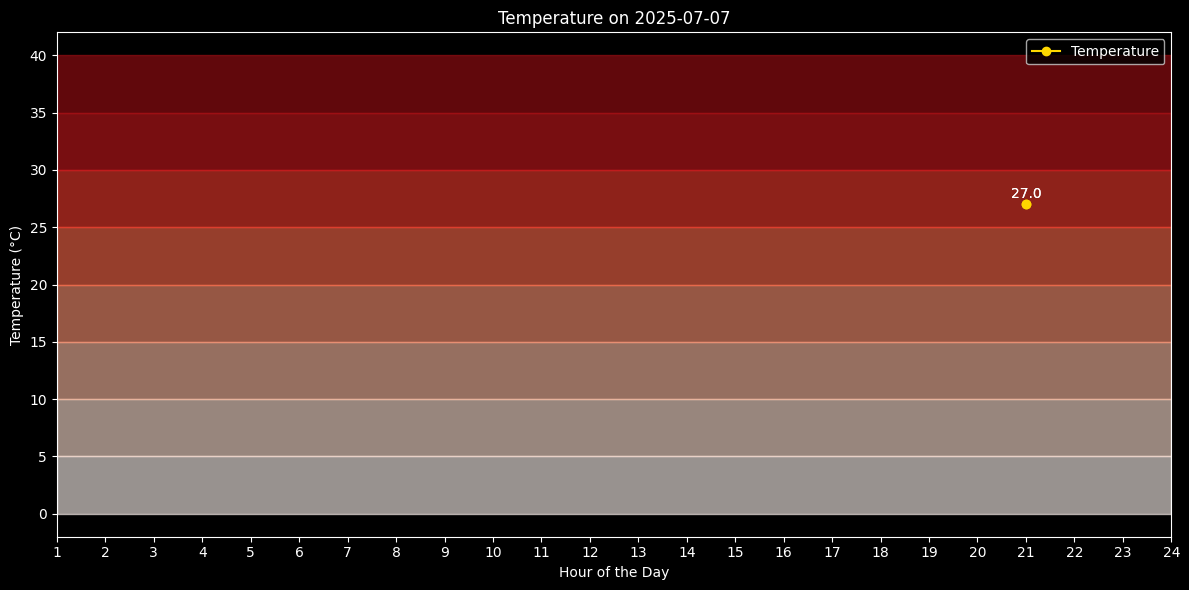

In [ ]:
import matplotlib.pyplot as plt
from datetime import date


conn = sqlite3.connect("D:/Test/data/DB/weather_data.db") # enter you sqlite DB location here
df = pd.read_sql_query("SELECT * FROM current_weather", conn)
conn.close()

# Get the latest date from the data
latest_date = df['observation_date'].max()
df = df[df['observation_date'] == latest_date]

# Prepare data
df['datetime'] = pd.to_datetime(df['observation_date'].astype(str) + ' ' + df['observation_time'].astype(str))
df['hour'] = df['datetime'].dt.hour

# Sort for correct plotting
df = df.sort_values('hour')

# Setup plot
fig, ax = plt.subplots(figsize=(12, 6))

min_temp = 0  # Start at 0°C
max_temp = 40  # Cap at 40°C for banding
cmap = plt.cm.Reds

# Create bands for every 5°C up to 40°C
for t in range(min_temp, max_temp, 5):
    norm_val = (t - min_temp) / (max_temp - min_temp)
    color = cmap(norm_val)  # Gradual color for each 5°C band
    ax.axhspan(t, t + 5, color=color, alpha=0.6)

# Band for temperatures above 40°C (red at the max)
if df['temperature'].max() > 40:
    ax.axhspan(40, df['temperature'].max() + 2, color=cmap(1.0), alpha=0.7) 

# Plot the line and points
ax.plot(df['hour'], df['temperature'], marker='o', linestyle='-', color='gold', label='Temperature')

# Add value labels on points
for x, y in zip(df['hour'], df['temperature']):
    ax.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Temperature (°C)')
ax.set_title(f'Temperature on {pd.to_datetime(latest_date).date()}')
ax.set_xticks(range(24))
ax.set_xticklabels([str(i + 1) for i in range(24)])  # Display 1–24
ax.legend()
plt.tight_layout()
plt.show()